In [6]:
import pandas as pd
import riskfolio as rp
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
start = "2016-01-01"
end = "2019-12-30"

assets = [
    "JCI", "TGT", "CMCSA", "CPB", "MO", "APA", "MMC", "JPM", "ZION",
    "PSA", "BAX", "BMY", "LUV", "PCAR", "TXT", "TMO", "DE", "MSFT",
    "HPQ", "SEE", "VZ", "CNP", "NI", "T", "BA"
]

prices = yf.download(assets, start=start, end=end)["Adj Close"]
returns = prices.pct_change().dropna()

[*********************100%***********************]  25 of 25 completed


In [7]:
port = rp.Portfolio(returns=returns)

port.assets_stats(method_mu="hist", method_cov="ledoit") #We calculate the portfolio's expected returns using historical data while Ledoit-Wolf method provides stable covariance matrix
port.lowerret = 0.00056488 * 1.5 #We also set a target return

model = "Classic"
rm = "MV" #mean-variance

#We define the optimization model and risk measure to guide portfolio optimization. 
#Using risk parity optimization with the "Classic" model and Mean-Variance ("MV") risk measure, 
#we determine optimal asset allocation.

w_rp = port.rp_optimization(model=model, rm=rm) #calculates asset weights to minimize risk and meet return targets

In [6]:
# Define Constraints and re-optimize the portfolio

In [8]:
asset_classes = {
    "Assets": assets,
    "Industry": [
        "Consumer Discretionary", "Consumer Discretionary", "Consumer Discretionary",
        "Consumer Staples", "Consumer Staples", "Energy", "Financials", "Financials",
        "Financials", "Financials", "Health Care", "Health Care", "Industrials",
        "Industrials", "Industrials", "Health Care", "Industrials",
        "Information Technology", "Information Technology", "Materials",
        "Telecommunications Services", "Utilities", "Utilities",
        "Telecommunications Services", "Financials"
    ]
}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=["Assets"])

constraints = {
    "Disabled": [False, False, False, False, False],
    "Type": ["All Assets", "Classes", "Classes", "Classes", "Classes"],
    "Set": ["", "Industry", "Industry", "Industry", "Industry"],
    "Position": ["", "Financials", "Utilities", "Industrials", "Consumer Discretionary"],
    "Sign": ["<=", "<=", "<=", "<=", "<="],
    "Weight": [0.10, 0.2, 0.2, 0.2, 0.2],
    "Type Relative": ["", "", "", "", ""],
    "Relative Set": ["", "", "", "", ""],
    "Relative": ["", "", "", "", ""],
    "Factor": ["", "", "", "", ""]
}

constraints = pd.DataFrame(constraints)

A, B = rp.assets_constraints(constraints, asset_classes)

port.ainequality = A
port.binequality = B

w_rp = port.rp_optimization(model=model, rm=rm)

AttributeError: 'DataFrame' object has no attribute 'append'

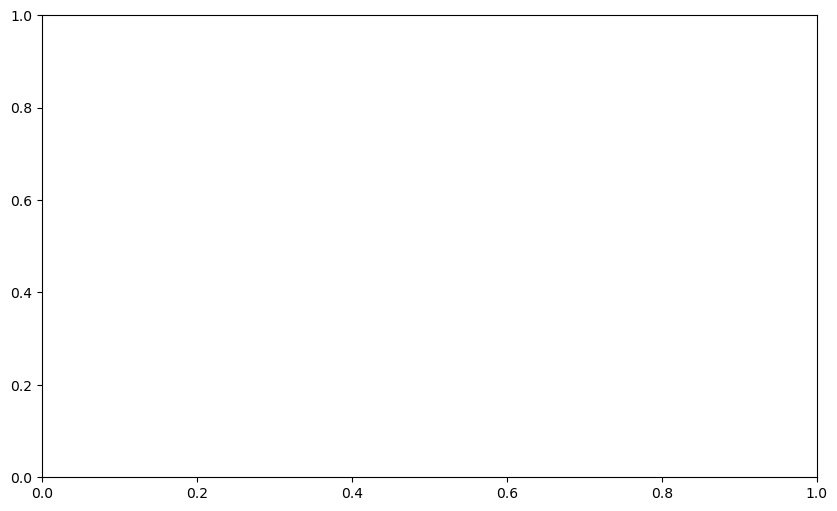

In [22]:
rp.plot_pie(
    w=w_rp, 
    others=0.05,
    nrow=25,
    height=6,
    width=10
)

<Axes: title={'center': 'Risk (Standard Deviation) Contribution per Asset'}>

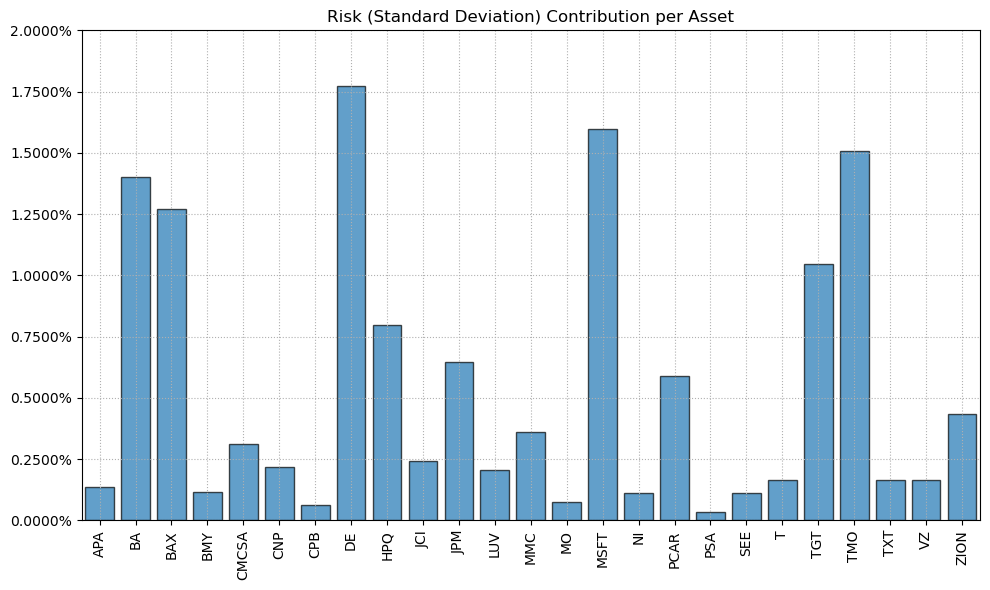

In [23]:
rp.plot_risk_con(
    w_rp, 
    cov=port.cov, 
    returns=port.returns, 
    height=6,
    width=10
)